In [3]:
import pandas as pd
df = pd.read_csv('../datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
target = df.Survived
inputs = df.drop('Survived',axis='columns')

In [6]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [7]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [8]:
inputs.drop(['Sex'],axis='columns',inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [9]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [10]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [11]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head(8)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1
6,1,54.000000,51.8625,0,1
7,3,2.000000,21.0750,0,1


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2)

In [13]:
len(X_train)

712

In [14]:
len(inputs)

891

In [15]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [16]:
model.fit(X_train,y_train)

GaussianNB()

In [17]:
model.score(X_test,y_test)

0.7877094972067039

In [18]:
X_test[:10]

,Pclass,Age,Fare,female,male
810,3,26.000000,7.8875,0,1
181,2,29.699118,15.0500,0,1
528,3,39.000000,7.9250,0,1
216,3,27.000000,7.9250,1,0
869,3,4.000000,11.1333,0,1
294,3,24.000000,7.8958,0,1
355,3,28.000000,9.5000,0,1
160,3,44.000000,16.1000,0,1
482,3,50.000000,8.0500,0,1
428,3,29.699118,7.7500,0,1


In [19]:
y_test[:10]

810    0
181    0
528    0
216    1
869    1
294    0
355    0
160    0
482    0
428    0
Name: Survived, dtype: int64

In [20]:
model.predict(X_test[:10])

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
model.predict_proba(X_test[:10])

array([[0.99096708, 0.00903292],
       [0.98152687, 0.01847313],
       [0.99187653, 0.00812347],
       [0.09768103, 0.90231897],
       [0.98387195, 0.01612805],
       [0.99066567, 0.00933433],
       [0.99133952, 0.00866048],
       [0.99211436, 0.00788564],
       [0.99140967, 0.00859033],
       [0.99138941, 0.00861059]])

In [22]:
# Email spam detector
df = pd.read_csv('../datasets/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
#data exploration
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [24]:
df['spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [25]:
X_train,X_test,y_train,y_test = train_test_split(df.Message,df.spam,test_size=0.25)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [28]:
emails = [
    'Hey Mohan, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [29]:
X_test_count = v.transform(X_test)
model.score(X_test_count,y_test)

0.9892318736539842

In [30]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [31]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [32]:
clf.score(X_test,y_test)

0.9892318736539842

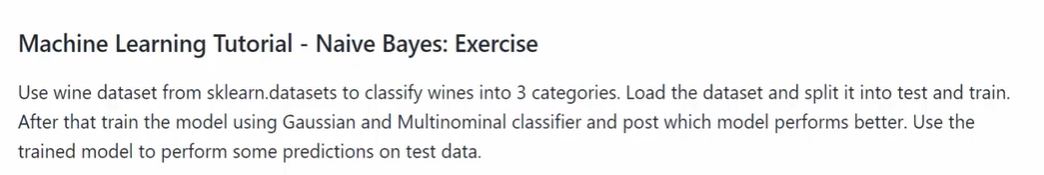

In [33]:
from sklearn.datasets import load_wine
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [34]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [35]:
wine.data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [36]:
gnb = GaussianNB()
mcnb = MultinomialNB()

In [37]:
wine.target[0]

0

In [38]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [42]:
X_train,X_test,y_train,y_test = train_test_split(wine.data,wine.target,test_size=0.25)

In [43]:
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

0.9777777777777777

In [44]:
mcnb.fit(X_train,y_train)
mcnb.score(X_test,y_test)

0.8444444444444444